In [1]:
import numpy as np
import matplotlib.pyplot as plt
import graphs_helper
import time
from scipy.optimize import curve_fit
import scipy.optimize
import pylab
import pickle
import db_edit
import db_connection
import db_transfers

# Rubrics 375

In [4]:
# RUN ONLY ONCE
"""
# move to bin data from GOOD_DATA_SILSO

# connect to DATA_SILSO_HISTO
cursor,mydb = db_connection.database_connector(the_database="DATA_SILSO_HISTO")
query = "SELECT * FROM DATA WHERE FK_RUBRICS=211"
cursor.execute(query,())
rubrics375_original = cursor.fetchall()
g = open("rubrics375_original.pickle","wb")
pickle.dump(rubrics375_original,g)
g.close()
db_connection.close_database_connection(mydb)
ids=[f[0] for f in rubrics375_original]

# move to bin in GOOD_DATA_SILSO
# In BAD_DATA_SILSO I will delete with terminal
cursor2,mydb2 = db_connection.database_connector(the_database="GOOD_DATA_SILSO")
for id_number in ids:
    db_transfers.move_data_to_bin_only_good(id_number,cursor2=cursor2,mydb2=mydb2,close_databases=False)

"""



mysql connection successfully established with DATA_SILSO_HISTO
Closing MySQL connection...

mysql connection successfully established with GOOD_DATA_SILSO
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rub

deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
there does not exist any data with the id_number 44006 in the database GOOD_DATA_SILSO
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbish bin
deleted from original
copied into rubbi

In [5]:
print(rubrics375_original)

[(43824, datetime.date(1877, 1, 1), 211, 49, 0, 0, 0, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43825, datetime.date(1877, 1, 3), 211, 49, 0, 0, 0, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43826, datetime.date(1877, 1, 4), 211, 49, 1, 2, 12, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43827, datetime.date(1877, 1, 5), 211, 49, 1, 4, 14, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43828, datetime.date(1877, 1, 8), 211, 49, 1, 6, 16, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43829, datetime.date(1877, 1, 10), 211, 49, 3, 25, 55, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43830, datetime.date(1877, 1, 14), 211, 49, 2, 32, 52, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43831, datetime.date(1877, 1, 15), 211, 49, 2, 36, 56, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43832, datetime.date(1877, 1, 17), 211, 49, 2, 47, 67, None, '', datetime.datetime(2017, 8, 11, 8, 45, 34)

In [12]:
rubrics375_derived=[]
for i in rubrics375_original:
    groups=i[4]
    if groups==None:
        groups=0
    area=i[5]
    if area==None:
        area=0
    if i[10]==6:
        area+=0.5
    wolf=int(1.41*(10*groups+0.15*area)+0.5)
    sunspots = wolf-10*groups
    if sunspots<0:
        sunspots=1
    elif sunspots==0 and groups>0:
        sunspots=1
    j = (i[0],i[1],i[2],i[3],groups,sunspots,wolf,i[7],'derived',i[9],7)
    rubrics375_derived.append(j)

print(rubrics375_derived)
# pickle it too
g = open("rubrics375_derived_old_ids.pickle","wb")
pickle.dump(rubrics375_derived,g)
g.close()

[(43824, datetime.date(1877, 1, 1), 211, 49, 0, 0, 0, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43825, datetime.date(1877, 1, 3), 211, 49, 0, 0, 0, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43826, datetime.date(1877, 1, 4), 211, 49, 1, 5, 15, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43827, datetime.date(1877, 1, 5), 211, 49, 1, 5, 15, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43828, datetime.date(1877, 1, 8), 211, 49, 1, 5, 15, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43829, datetime.date(1877, 1, 10), 211, 49, 3, 18, 48, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43830, datetime.date(1877, 1, 14), 211, 49, 2, 15, 35, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43831, datetime.date(1877, 1, 15), 211, 49, 2, 16, 36, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (43832, datetime.date(1877, 1, 17), 211, 49, 2, 18,

In [14]:
# RUN ONLY ONCE
"""
# insert these into the old format (don't provide ids!)

cursor,mydb = db_connection.database_connector(the_database="DATA_SILSO_HISTO")
for i in rubrics375_derived:
    date=i[1]
    fk_rubrics=1012
    fk_observers=i[3]
    groups=i[4]
    sunspots=i[5]
    wolf=i[6]
    comment='derived'
    date_insert=i[9]
    flag=7
    db_edit.insert_old_format(date=date,
                              fk_rubrics=fk_rubrics,
                              fk_observers=fk_observers,
                              groups=groups,
                              sunspots=sunspots,
                              wolf=wolf,
                              comment=comment,
                              date_insert=date_insert,
                              flag=flag,
                              close_connection=False,
                              the_database="DATA_SILSO_HISTO")
    
"""


mysql connection successfully established with DATA_SILSO_HISTO

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted


data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established wi

data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted

mysql connection successfully established with DATA_SILSO_HISTO
data-point inserted


In [16]:
# RUN ONLY ONCE
"""
# add to 'area' the non derived comments
cursor,mydb= db_connection.database_connector(the_database="DATA_SILSO_HISTO")
ids = [f[0] for f in rubrics375_original]
for i in ids:
    db_edit.add_to_comment(i,"area non derived",cursor=cursor,mydb=mydb)



db_connection.close_database_connection(mydb)
"""


mysql connection successfully established with DATA_SILSO_HISTO

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43824 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43825 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43826 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43827 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43828 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43829 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43830 has been added

original_comment:
adding to com

successfully updated the comment 
the comment for ID=43913 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43914 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43915 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43916 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43917 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43918 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43919 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=43920 has been added

original_comment:
addi

successfully updated the comment 
the comment for ID=44007 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=44008 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=44009 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=44010 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=44011 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=44012 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=44013 has been added

original_comment:
adding to comment: area non derived
successfully updated the comment 
the comment for ID=44014 has been added

original_comment:
addi

In [5]:
cursor,mydb = db_connection.database_connector(the_database="DATA_SILSO_HISTO")
query = "SELECT * FROM DATA WHERE FK_RUBRICS=1012"
cursor.execute(query,())
rubrics375_derived=cursor.fetchall()
db_connection.close_database_connection(mydb)
print(rubrics375_derived)


mysql connection successfully established with DATA_SILSO_HISTO
Closing MySQL connection...
[(210771, datetime.date(1877, 1, 1), 1012, 49, 0, 0, 0, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (210772, datetime.date(1877, 1, 3), 1012, 49, 0, 0, 0, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (210773, datetime.date(1877, 1, 4), 1012, 49, 1, 5, 15, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (210774, datetime.date(1877, 1, 5), 1012, 49, 1, 5, 15, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (210775, datetime.date(1877, 1, 8), 1012, 49, 1, 5, 15, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (210776, datetime.date(1877, 1, 10), 1012, 49, 3, 18, 48, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (210777, datetime.date(1877, 1, 14), 1012, 49, 2, 15, 35, None, 'derived', datetime.datetime(2017, 8, 11, 8, 45, 34), 7), (210778, datetime.date(1877, 1, 15), 1012, 49, 2, 16, 36, None, 

In [6]:
# ONLY ONCE
"""
# copy the data using db_tranfer
ids = [f[0] for f in rubrics375_derived]
for i in ids:
    db_transfers.db_transfer(i,sender="DATA_SILSO_HISTO",close_connections=True,dont_delete=True)
    
"""


mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Clos

successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully establishe

Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO

Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO


mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched dat

successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
successfully fetched data from DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
Data added to database
Closing MySQL connection...
Closing MySQL connection...

mysql connection successfully establishe

# Rubrics 363, 339, 334
### 363 (fk = 204)
TOTAL SIZE = 228 ; 
SIZE IN GOOD = 73 ; 
SIZE IN BAD = 155
### 339 (fk = 196)
TOTAL SIZE = 231 ; 
SIZE IN GOOD = 50 ; 
SIZE IN BAD = 181
### 334 (fk = 191) - this one also has lagre groups
TOTAL SIZE = 263 ; 
SIZE IN GOOD = 6 ; 
SIZE IN BAD = 257

In [22]:
155+181

336

In [20]:
# RUN ONCE
"""
# all those with flag 9 in the database, check, 
# if there are sunspots raise an exception, 
# if the groups exceed 4 raise an exception
# update the databases appropriately
cursor,mydb = db_connection.database_connector(the_database="BAD_DATA_SILSO")
query = "SELECT * FROM DATA WHERE FLAG=9 AND NOT FK_RUBRICS=191"
cursor.execute(query,())
data = cursor.fetchall()
groups = [f[4] for f in data]
sunspots = [f[5] for f in data]
if len(data) != 155 + 181:
    print("Wrong len data")
    input()
    raise Exception
for i in range(len(data)):
    if groups[i]>4 or sunspots[i]!=None:
        print("groups ",groups[i],"\tsunspots:",sunspots[i])
        input()
        raise Exception


new_data = [list(f) for f in data]

for i in new_data:
    g = i[4]# groups
    s=None
    w=None
    if g==0:
        w,s=0,0
    elif g==1:
        w,s=14,4
    elif g==2:
        w,s=28,8
    elif g==3:
        w,s=41,11
    elif g==4:
        w,s=54,14
    else:
        print("this should already have been dealt with")
        input()
        raise Exception
    i[5]=s
    i[6]=w

for i in new_data:
    query = "UPDATE DATA SET SUNSPOTS="+str(i[5])+",WOLF="+str(i[6])+" WHERE ID="+str(i[0])
    cursor.execute(query,())
    mydb.commit()

db_connection.close_database_connection(mydb)
"""


mysql connection successfully established with BAD_DATA_SILSO
Closing MySQL connection...


In [27]:
# RUN ONCE
"""
# transfer from BAD to GOOD
cursor,mydb = db_connection.database_connector(the_database="BAD_DATA_SILSO")
cursor2,mydb2 = db_connection.database_connector(the_database="GOOD_DATA_SILSO")
query = "SELECT * FROM DATA WHERE FLAG=9"
cursor.execute(query,())
data = cursor.fetchall()
ids = [i[0] for i in data]
for i in ids:
    db_transfers.db_transfer(i,sender="BAD_DATA_SILSO",recipient="GOOD_DATA_SILSO",cursor=cursor,mydb=mydb,cursor2=cursor2,mydb2=mydb2,close_connections=False,dont_delete=False)
db_connection.close_database_connection(mydb)
db_connection.close_database_connection(mydb2)
"""


mysql connection successfully established with BAD_DATA_SILSO

mysql connection successfully established with GOOD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37784 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37785 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37787 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37788 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37789 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37790 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37791 deleted from database BAD_DATA_SILSO
successfully fetched data from BA

Data added to database
Data ID=37884 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37885 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37886 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37887 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37889 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37890 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37891 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37892 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37893 del

Data ID=37978 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37979 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37980 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37981 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37982 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37983 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37984 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37985 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=37986 deleted from database BAD_

successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40388 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40394 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40395 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40396 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40397 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40398 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40400 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40401 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_

successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40503 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40504 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40505 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40506 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40509 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40510 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40511 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_SILSO
Data added to database
Data ID=40512 deleted from database BAD_DATA_SILSO
successfully fetched data from BAD_DATA_


mysql connection successfully established with GOOD_DATA_SILSO
data successfully retrieved
Closing MySQL connection...


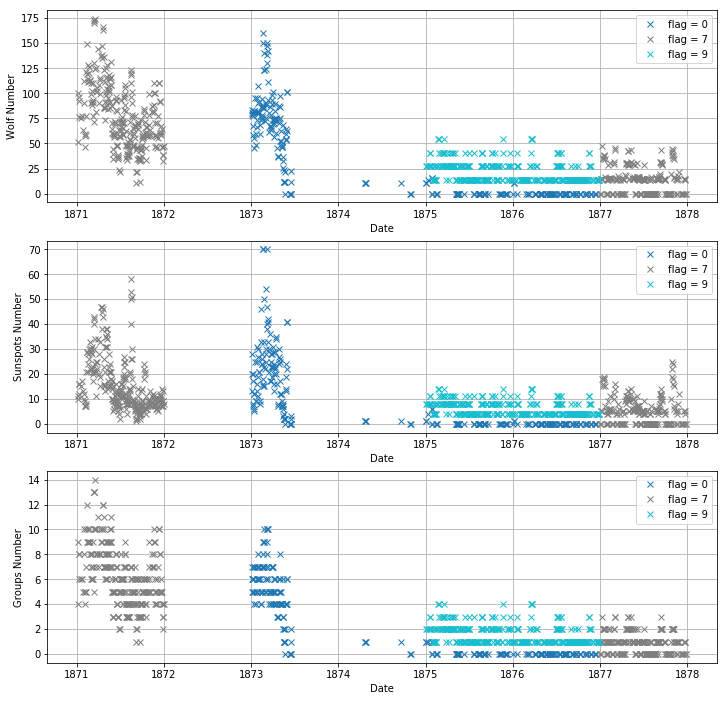

In [28]:
graphs_helper.display_seperate_flags_all("Secchi")